Analysis of Pyber:

Based on Pyber's current data it is clear that the Urban market is the most lucrative.

Looking at the chart 1, Pyber Ride Sharing Data, there is a positive correlation between the ruralness of a city and the expensiveness of the fare.  This is a respected result as the distances traveled are greater in rural areas then in cities.  We can also see that the number of rides decreases with the ruralness and inversely it increases in more urban areas.

Pie Chart 1 - Fares by City Type shows that the greatest percentage of fares comes from Urban areas (~62%), with Suburban areas making up ~30%.  The percentage of fares in Rural areas makes up less than 10% of total fares.

Pie Chart 2 - Rides by City Type, very closely correlates with the previous chart.  This result was predicted throught the original chart.

Pie Chart 3 - Drivers by City Type, however does shows that there are less drivers in Rural and Suburban areas that are doing the driving.  Urban Drivers make up ~86% of the Pyber driving force.


In [1]:
%matplotlib notebook

In [2]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#import csv files
city = "../desktop/pyber_data/city_data.csv"
ride = "../desktop/pyber_data/ride_data.csv"

city_df = pd.read_csv(city)
ride_df = pd.read_csv(ride)

In [4]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
#merge datasets
cityride_df = pd.merge(ride_df, city_df, how='outer', on='city')
cityride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [7]:
#Create Three City Types

rural = cityride_df.loc[(cityride_df['type'] == "Rural")]
urban = cityride_df.loc[(cityride_df['type'] == "Urban")]
suburban = cityride_df.loc[(cityride_df['type'] == "Suburban")]

suburban.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2018-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,Barronchester,2018-05-05 04:03:11,30.38,2281522828169,11,Suburban
1627,Barronchester,2018-04-25 19:11:43,36.13,2660177707065,11,Suburban
1628,Barronchester,2018-03-31 06:05:30,44.24,1252888806772,11,Suburban
1629,Barronchester,2018-03-02 23:36:58,36.49,4031573980778,11,Suburban


In [8]:
#RURAL - Calculate per city: Average Fare, Total Rides, # of Drivers
avgfare_rural = rural.groupby(['city'])['fare'].mean()
totalrides_rural = rural.groupby(['city']).count()['ride_id']
drivers_rural = rural.groupby(['city'])['driver_count'].value_counts()

#URBAN - Calculate per city: Average Fare, Total Rides, # of Drivers
avgfare_urban = urban.groupby(['city'])['fare'].mean()
totalrides_urban = urban.groupby(['city']).count()['ride_id']
drivers_urban = urban.groupby(['city'])['driver_count'].value_counts()

#SUBURBAN - Calculate per city: Average Fare, Total Rides, # of Drivers
avgfare_suburban = suburban.groupby(['city'])['fare'].mean()
totalrides_suburban = suburban.groupby(['city']).count()['ride_id']
drivers_suburban = suburban.groupby(['city'])['driver_count'].value_counts()

<IPython.core.display.Javascript object>


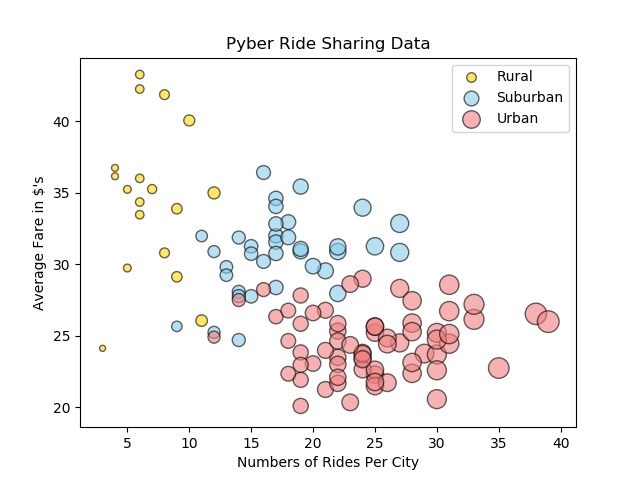

In [20]:
#Create scatter plots for each type of city
plt.scatter(totalrides_rural, avgfare_rural,s=drivers_rural*25,
            marker ='.', facecolors ="gold", edgecolors='black',alpha = 0.6, label="Rural")
plt.scatter(totalrides_suburban, avgfare_suburban,s=drivers_suburban*25,
            marker ='.', facecolors ="skyblue", edgecolors='black',alpha = 0.6, label="Suburban")
plt.scatter(totalrides_urban, avgfare_urban,s=drivers_urban*25,
            marker ='.', facecolors ="lightcoral", edgecolors='black',alpha = 0.6, label="Urban")

In [21]:
#Add Labels to the chart
#Chart title
plt.title("Pyber Ride Sharing Data")
#x label
plt.xlabel("Numbers of Rides Per City")
#y label
plt.ylabel("Average Fare in $'s")
#legend 
plt.legend(loc='upper right')
plt.show()

In [22]:
#Save an image of the chart
plt.savefig("images/BubblePlot-Pyber_Ride_Sharing.png")

In [ ]:
#####################   TURN OFF INTERACTION OF PREVIOUS CHART   #####################

<IPython.core.display.Javascript object>


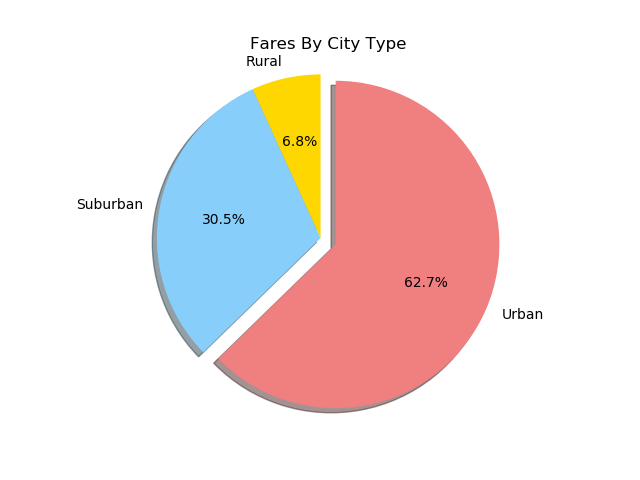

In [30]:
#PIE CHART 1 - Fares by City 
#Calculate Total Fare by City Type 
total_fare = cityride_df.groupby(['type'])['fare'].sum()

#Label the sections
labels = ["Rural","Suburban","Urban" ]

#Color each section
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

plt.title("Fares By City Type")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [24]:
#save image
plt.savefig("images/PieChart1-Fares_By_City_Type.png")

In [ ]:
#####################   TURN OFF INTERACTION OF PREVIOUS CHART   #####################

<IPython.core.display.Javascript object>


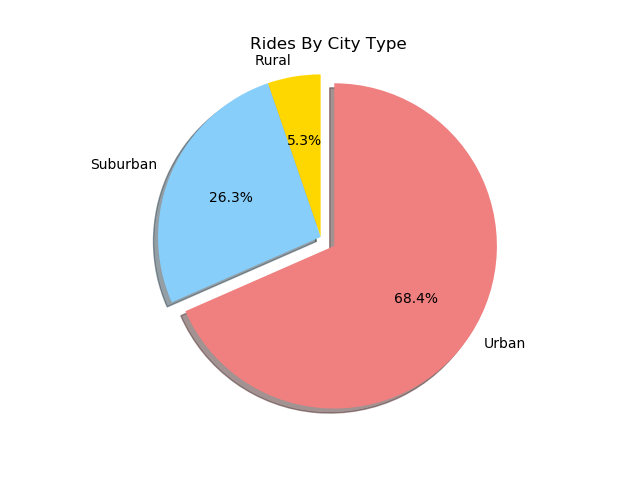

In [31]:
#PIE CHART 2 - Rides by City Type
#Calculate Total Rides by City Type
total_rides = cityride_df.groupby(['type'])['ride_id'].count()
#Label the sections
labels = ["Rural","Suburban","Urban" ]
#Color each section
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("Rides By City Type")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [26]:
#save image
plt.savefig("images/PieChart2-Rides_By_City_Type.png")

In [ ]:
#####################   TURN OFF INTERACTION OF PREVIOUS CHART   #####################

<IPython.core.display.Javascript object>


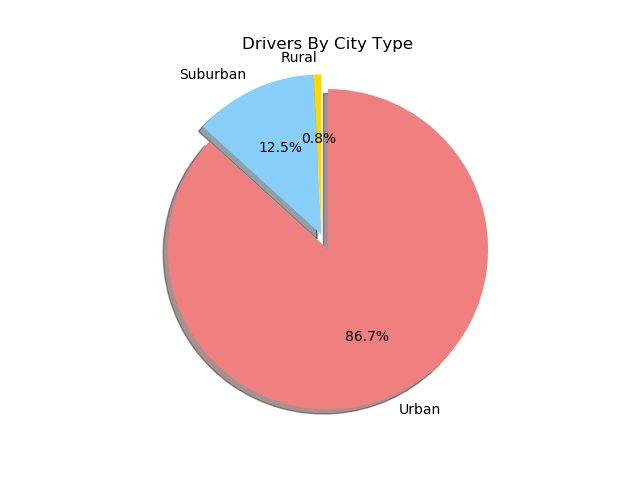

In [32]:
#Pie Chart 3
# Calculate Total Drivers by City Type
total_drivers = cityride_df.groupby(['type'])['driver_count'].sum()
#Label the sections
labels = ["Rural","Suburban","Urban" ]
#Color each section
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("Drivers By City Type")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [28]:
#save image
plt.savefig("images/PieChart3-Drivers_By_City_Type.png")